#📌 Extracción


#**Librerias**

In [323]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

df_datos = pd.read_csv('/content/tabela tratada (1).csv')
df_datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


# Tratamiento de los datos

In [324]:
df_datos= df_datos.drop(columns=['customerID'])

In [325]:
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7043 non-null   object 
 2   customer.SeniorCitizen     7043 non-null   int64  
 3   customer.Partner           7043 non-null   object 
 4   customer.Dependents        7043 non-null   object 
 5   customer.tenure            7043 non-null   int64  
 6   phone.PhoneService         7043 non-null   object 
 7   phone.MultipleLines        7043 non-null   object 
 8   internet.InternetService   7043 non-null   object 
 9   internet.OnlineSecurity    7043 non-null   object 
 10  internet.OnlineBackup      7043 non-null   object 
 11  internet.DeviceProtection  7043 non-null   object 
 12  internet.TechSupport       7043 non-null   object 
 13  internet.StreamingTV       7043 non-null   objec

In [326]:
print (df_datos.isnull().sum())
#Eliminmo los valores nulo o vacios
df_datos= df_datos.dropna()

Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
Total.Day                    11
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [327]:
print (df_datos.isnull().sum())

Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
Total.Day                    0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [328]:
col_internet= ['internet.InternetService','internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport',
               'internet.StreamingTV','internet.StreamingMovies']

In [329]:
for col in col_internet:
    df_datos[col] = df_datos[col].replace('No internet service', 'No')

In [330]:
for i in  df_datos['phone.MultipleLines']:
   df_datos['phone.MultipleLines']= df_datos['phone.MultipleLines'].replace('No phone service', 'No')


In [331]:
df_clientes= df_datos.copy()

In [332]:
df_clientes

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.60,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.90,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,1.90,55.15,742.90
7039,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.84,85.10,1873.70
7040,No,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.55,50.30,92.75
7041,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,2.30,67.85,4627.65


In [333]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   object 
 1   customer.gender            7032 non-null   object 
 2   customer.SeniorCitizen     7032 non-null   int64  
 3   customer.Partner           7032 non-null   object 
 4   customer.Dependents        7032 non-null   object 
 5   customer.tenure            7032 non-null   int64  
 6   phone.PhoneService         7032 non-null   object 
 7   phone.MultipleLines        7032 non-null   object 
 8   internet.InternetService   7032 non-null   object 
 9   internet.OnlineSecurity    7032 non-null   object 
 10  internet.OnlineBackup      7032 non-null   object 
 11  internet.DeviceProtection  7032 non-null   object 
 12  internet.TechSupport       7032 non-null   object 
 13  internet.StreamingTV       7032 non-null   object 
 1

In [334]:
# Seleccionar las variables
categoricas= ['Churn','customer.gender','customer.Partner','customer.Dependents','internet.OnlineSecurity','internet.OnlineBackup',
              'internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies'
              ,'account.PaperlessBilling','account.Contract','account.PaymentMethod','internet.InternetService','phone.PhoneService','phone.MultipleLines']

In [335]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [336]:
columnas = df_clientes.columns

In [337]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),categoricas),
    remainder = 'passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)

In [338]:
X = one_hot.fit_transform(df_clientes)

In [339]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__Churn_Yes', 'onehotencoder__customer.gender_Male',
       'onehotencoder__customer.Partner_Yes',
       'onehotencoder__customer.Dependents_Yes',
       'onehotencoder__internet.OnlineSecurity_Yes',
       'onehotencoder__internet.OnlineBackup_Yes',
       'onehotencoder__internet.DeviceProtection_Yes',
       'onehotencoder__internet.TechSupport_Yes',
       'onehotencoder__internet.StreamingTV_Yes',
       'onehotencoder__internet.StreamingMovies_Yes',
       'onehotencoder__account.PaperlessBilling_Yes',
       'onehotencoder__account.Contract_Month-to-month',
       'onehotencoder__account.Contract_One year',
       'onehotencoder__account.Contract_Two year',
       'onehotencoder__account.PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__account.PaymentMethod_Credit card (automatic)',
       'onehotencoder__account.PaymentMethod_Electronic check',
       'onehotencoder__account.PaymentMethod_Mailed check',
       'onehotencoder__internet.Inter

In [340]:
df_codificado= pd.DataFrame(X, columns = one_hot.get_feature_names_out(columnas))
df_codificado

,onehotencoder__Churn_Yes,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__internet.OnlineSecurity_Yes,onehotencoder__internet.OnlineBackup_Yes,onehotencoder__internet.DeviceProtection_Yes,onehotencoder__internet.TechSupport_Yes,onehotencoder__internet.StreamingTV_Yes,onehotencoder__internet.StreamingMovies_Yes,...,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_Yes,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__Total.Day,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,9.0,2.20,65.60,593.30
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,9.0,2.01,59.90,542.40
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,4.0,2.34,73.90,280.85
3,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,13.0,3.17,98.00,1237.85
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,3.0,2.97,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,13.0,1.90,55.15,742.90
7028,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,22.0,2.84,85.10,1873.70
7029,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.55,50.30,92.75
7030,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,67.0,2.30,67.85,4627.65


In [341]:
#Verificacion de la proporcion
(df_codificado['onehotencoder__Churn_Yes'].value_counts(normalize=True))*100

,proportion
onehotencoder__Churn_Yes,
0.0,73.421502
1.0,26.578498


In [342]:
X = df_codificado.drop('onehotencoder__Churn_Yes', axis = 1)
y = df_codificado['onehotencoder__Churn_Yes']

In [343]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [344]:
from sklearn.preprocessing import MinMaxScaler

# Lista de columnas numéricas
columnas_numericas = [
    'onehotencoder__customer.gender_Male',
    'onehotencoder__customer.Partner_Yes',
    'onehotencoder__customer.Dependents_Yes',
    'onehotencoder__internet.OnlineSecurity_Yes',
    'onehotencoder__internet.OnlineBackup_Yes',
    'onehotencoder__internet.DeviceProtection_Yes',
    'onehotencoder__internet.TechSupport_Yes',
    'onehotencoder__internet.StreamingTV_Yes',
    'onehotencoder__internet.StreamingMovies_Yes',
    'onehotencoder__account.PaperlessBilling_Yes',
    'onehotencoder__account.Contract_Month-to-month',
    'onehotencoder__account.Contract_One year',
    'onehotencoder__account.Contract_Two year',
    'onehotencoder__account.PaymentMethod_Bank transfer (automatic)',
    'onehotencoder__account.PaymentMethod_Credit card (automatic)',
    'onehotencoder__account.PaymentMethod_Electronic check',
    'onehotencoder__account.PaymentMethod_Mailed check',
    'remainder__customer.SeniorCitizen',
    'remainder__customer.tenure',
    'remainder__Total.Day',
    'remainder__account.Charges.Monthly',
    'remainder__account.Charges.Total',
    'onehotencoder__internet.InternetService_DSL',
    'onehotencoder__internet.InternetService_Fiber optic',
    'onehotencoder__internet.InternetService_No',
    'onehotencoder__phone.PhoneService_Yes',
    'onehotencoder__phone.MultipleLines_Yes',
]

# Asegúrar que todas las columnas están en el DataFrame y convertidas en numérico
for col in columnas_numericas:
    df_codificado[col] = pd.to_numeric(df_codificado[col], errors='coerce')

# Selecciona solo esas columnas del DataFrame
df_numerico = df_codificado[columnas_numericas]

# Normaliza usando MinMaxScaler
normalizacion = MinMaxScaler()
df_numerico = normalizacion.fit_transform(df_numerico)

In [345]:
#Correlacion
correlacion= round(df_codificado.corr(),2)
correlacion

,onehotencoder__Churn_Yes,onehotencoder__customer.gender_Male,onehotencoder__customer.Partner_Yes,onehotencoder__customer.Dependents_Yes,onehotencoder__internet.OnlineSecurity_Yes,onehotencoder__internet.OnlineBackup_Yes,onehotencoder__internet.DeviceProtection_Yes,onehotencoder__internet.TechSupport_Yes,onehotencoder__internet.StreamingTV_Yes,onehotencoder__internet.StreamingMovies_Yes,...,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,onehotencoder__phone.PhoneService_Yes,onehotencoder__phone.MultipleLines_Yes,remainder__customer.SeniorCitizen,remainder__customer.tenure,remainder__Total.Day,remainder__account.Charges.Monthly,remainder__account.Charges.Total
onehotencoder__Churn_Yes,1.00,-0.01,-0.15,-0.16,-0.17,-0.08,-0.07,-0.16,0.06,0.06,...,-0.12,0.31,-0.23,0.01,0.04,0.15,-0.35,0.19,0.19,-0.20
onehotencoder__customer.gender_Male,-0.01,1.00,-0.00,0.01,-0.02,-0.01,-0.00,-0.01,-0.01,-0.01,...,0.01,-0.01,0.00,-0.01,-0.01,-0.00,0.01,-0.01,-0.01,0.00
onehotencoder__customer.Partner_Yes,-0.15,-0.00,1.00,0.45,0.14,0.14,0.15,0.12,0.12,0.12,...,-0.00,0.00,-0.00,0.02,0.14,0.02,0.38,0.10,0.10,0.32
onehotencoder__customer.Dependents_Yes,-0.16,0.01,0.45,1.00,0.08,0.02,0.01,0.06,-0.02,-0.04,...,0.05,-0.16,0.14,-0.00,-0.02,-0.21,0.16,-0.11,-0.11,0.06
onehotencoder__internet.OnlineSecurity_Yes,-0.17,-0.02,0.14,0.08,1.00,0.28,0.27,0.35,0.18,0.19,...,0.32,-0.03,-0.33,-0.09,0.10,-0.04,0.33,0.30,0.30,0.41
onehotencoder__internet.OnlineBackup_Yes,-0.08,-0.01,0.14,0.02,0.28,1.00,0.30,0.29,0.28,0.27,...,0.16,0.17,-0.38,-0.05,0.20,0.07,0.36,0.44,0.44,0.51
onehotencoder__internet.DeviceProtection_Yes,-0.07,-0.00,0.15,0.01,0.27,0.30,1.00,0.33,0.39,0.40,...,0.15,0.18,-0.38,-0.07,0.20,0.06,0.36,0.48,0.48,0.52
onehotencoder__internet.TechSupport_Yes,-0.16,-0.01,0.12,0.06,0.35,0.29,0.33,1.00,0.28,0.28,...,0.31,-0.02,-0.34,-0.10,0.10,-0.06,0.33,0.34,0.34,0.43
onehotencoder__internet.StreamingTV_Yes,0.06,-0.01,0.12,-0.02,0.18,0.28,0.39,0.28,1.00,0.53,...,0.01,0.33,-0.41,-0.02,0.26,0.11,0.28,0.63,0.63,0.52
onehotencoder__internet.StreamingMovies_Yes,0.06,-0.01,0.12,-0.04,0.19,0.27,0.40,0.28,0.53,1.00,...,0.03,0.32,-0.42,-0.03,0.26,0.12,0.29,0.63,0.63,0.52


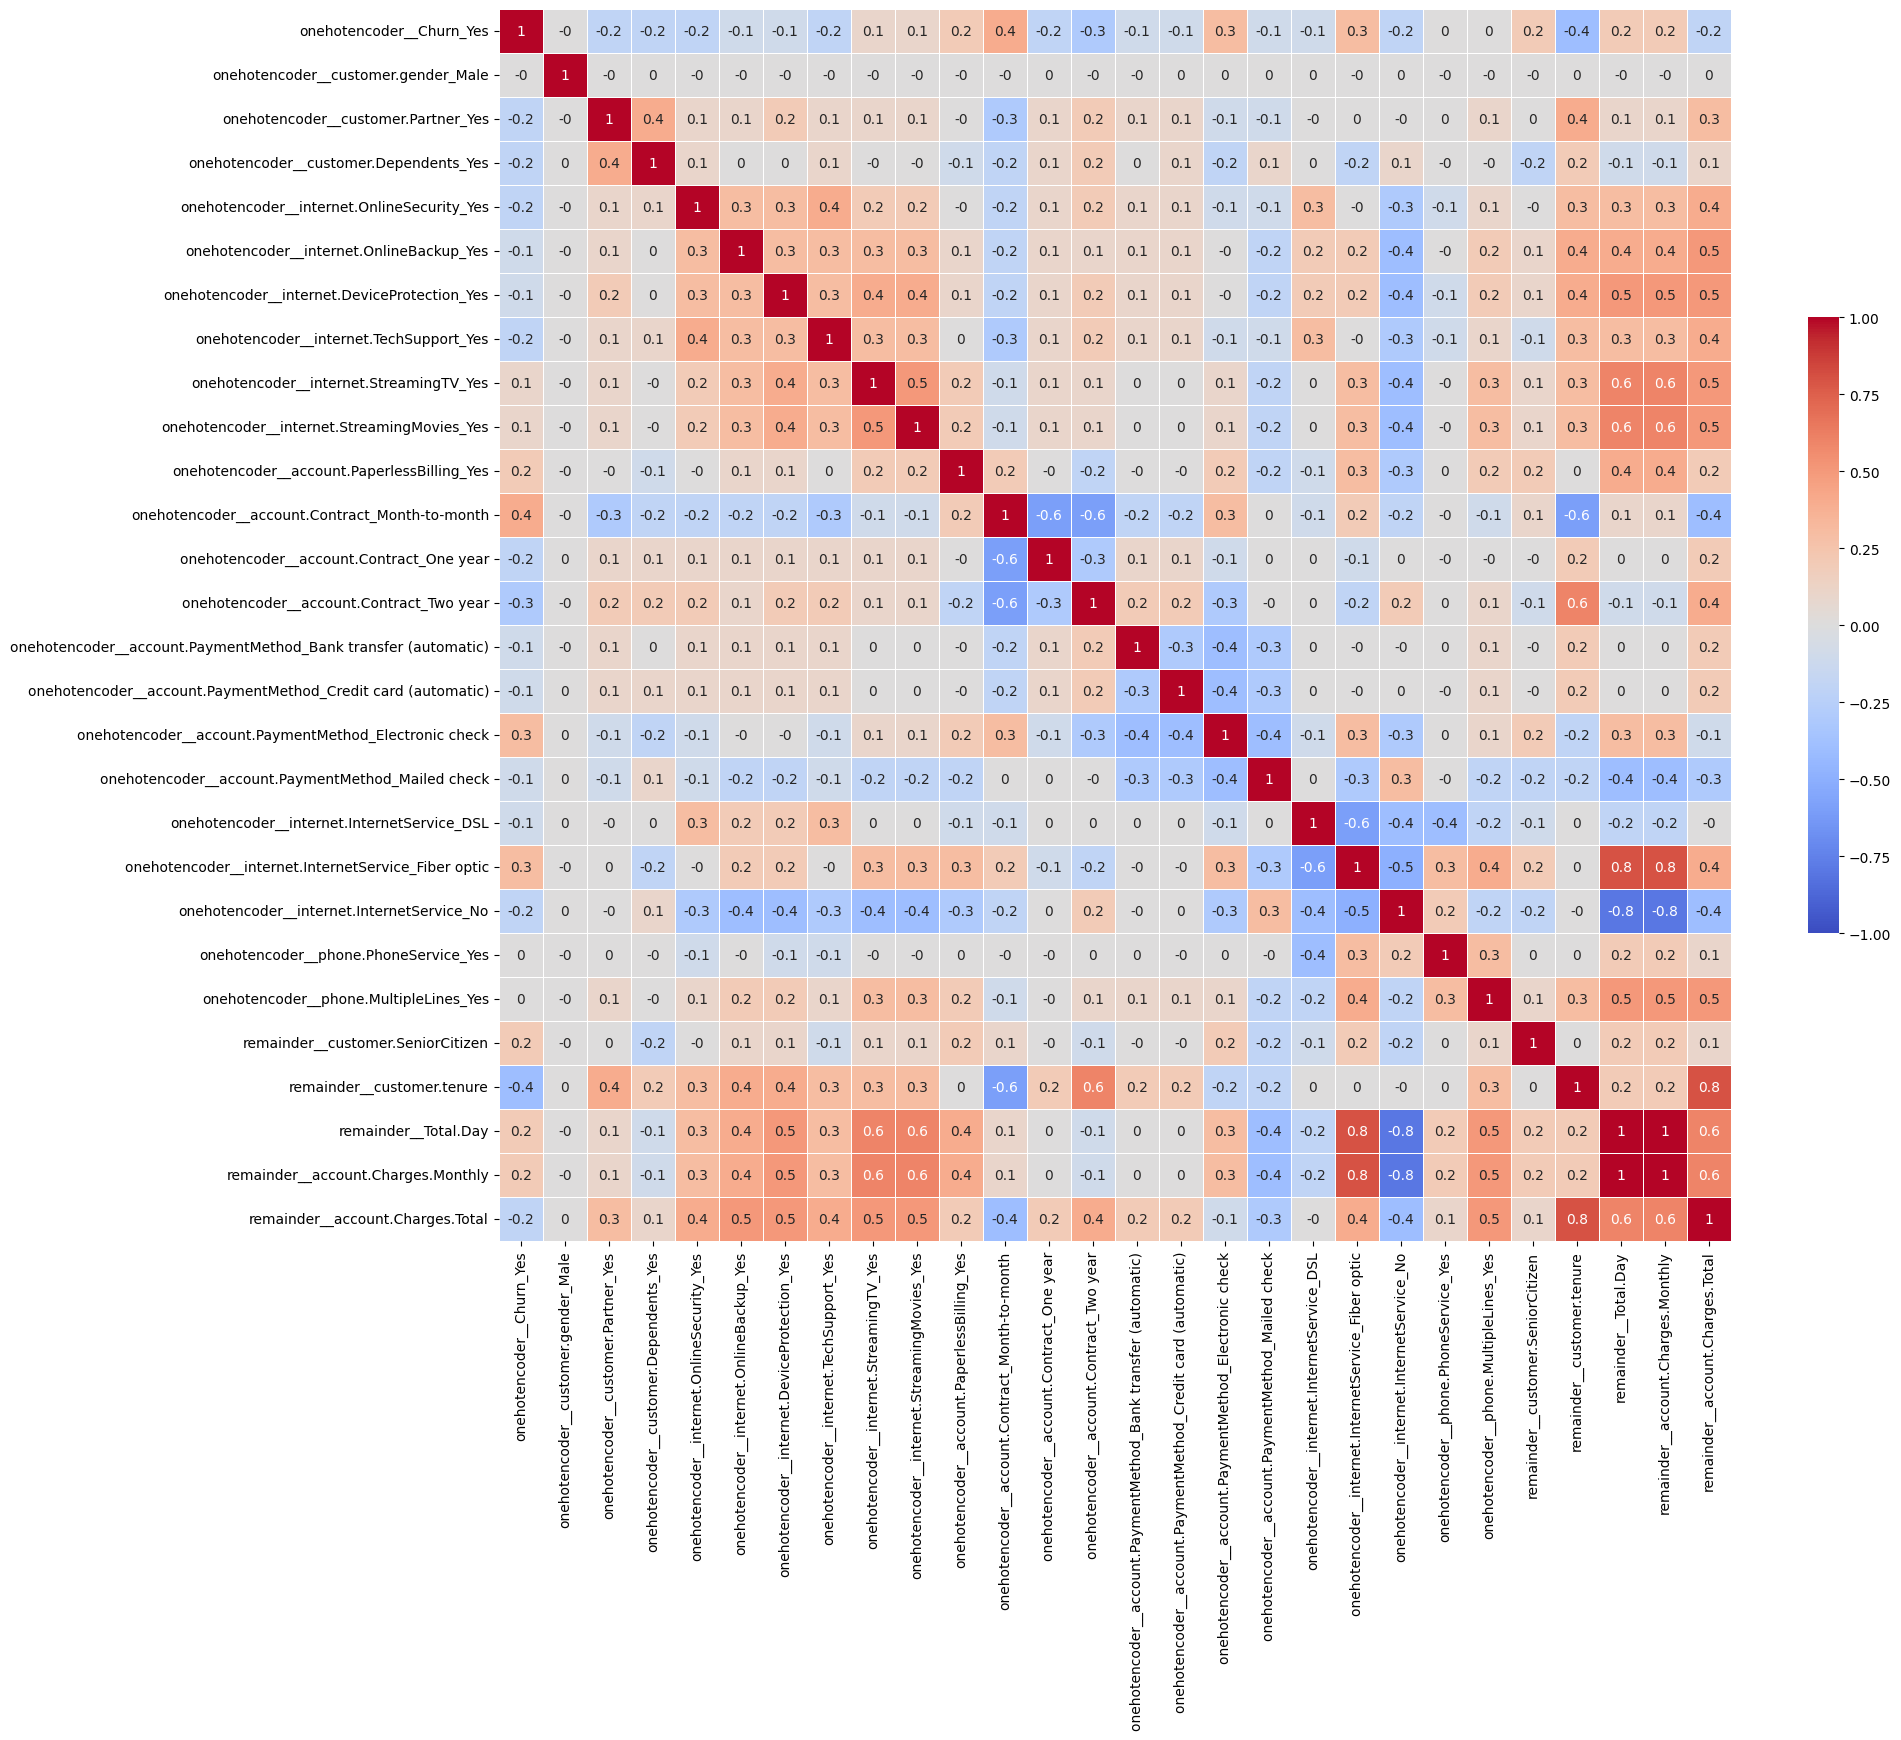

In [346]:
fig, ax  = plt.subplots(figsize =(20,16))
ax = sns.heatmap(np.round(correlacion,1), vmax=1, vmin=-1, center=0,
                 square=True, linewidths=.5, annot=True,cmap='coolwarm', cbar_kws={"shrink":.5})
plt.show()

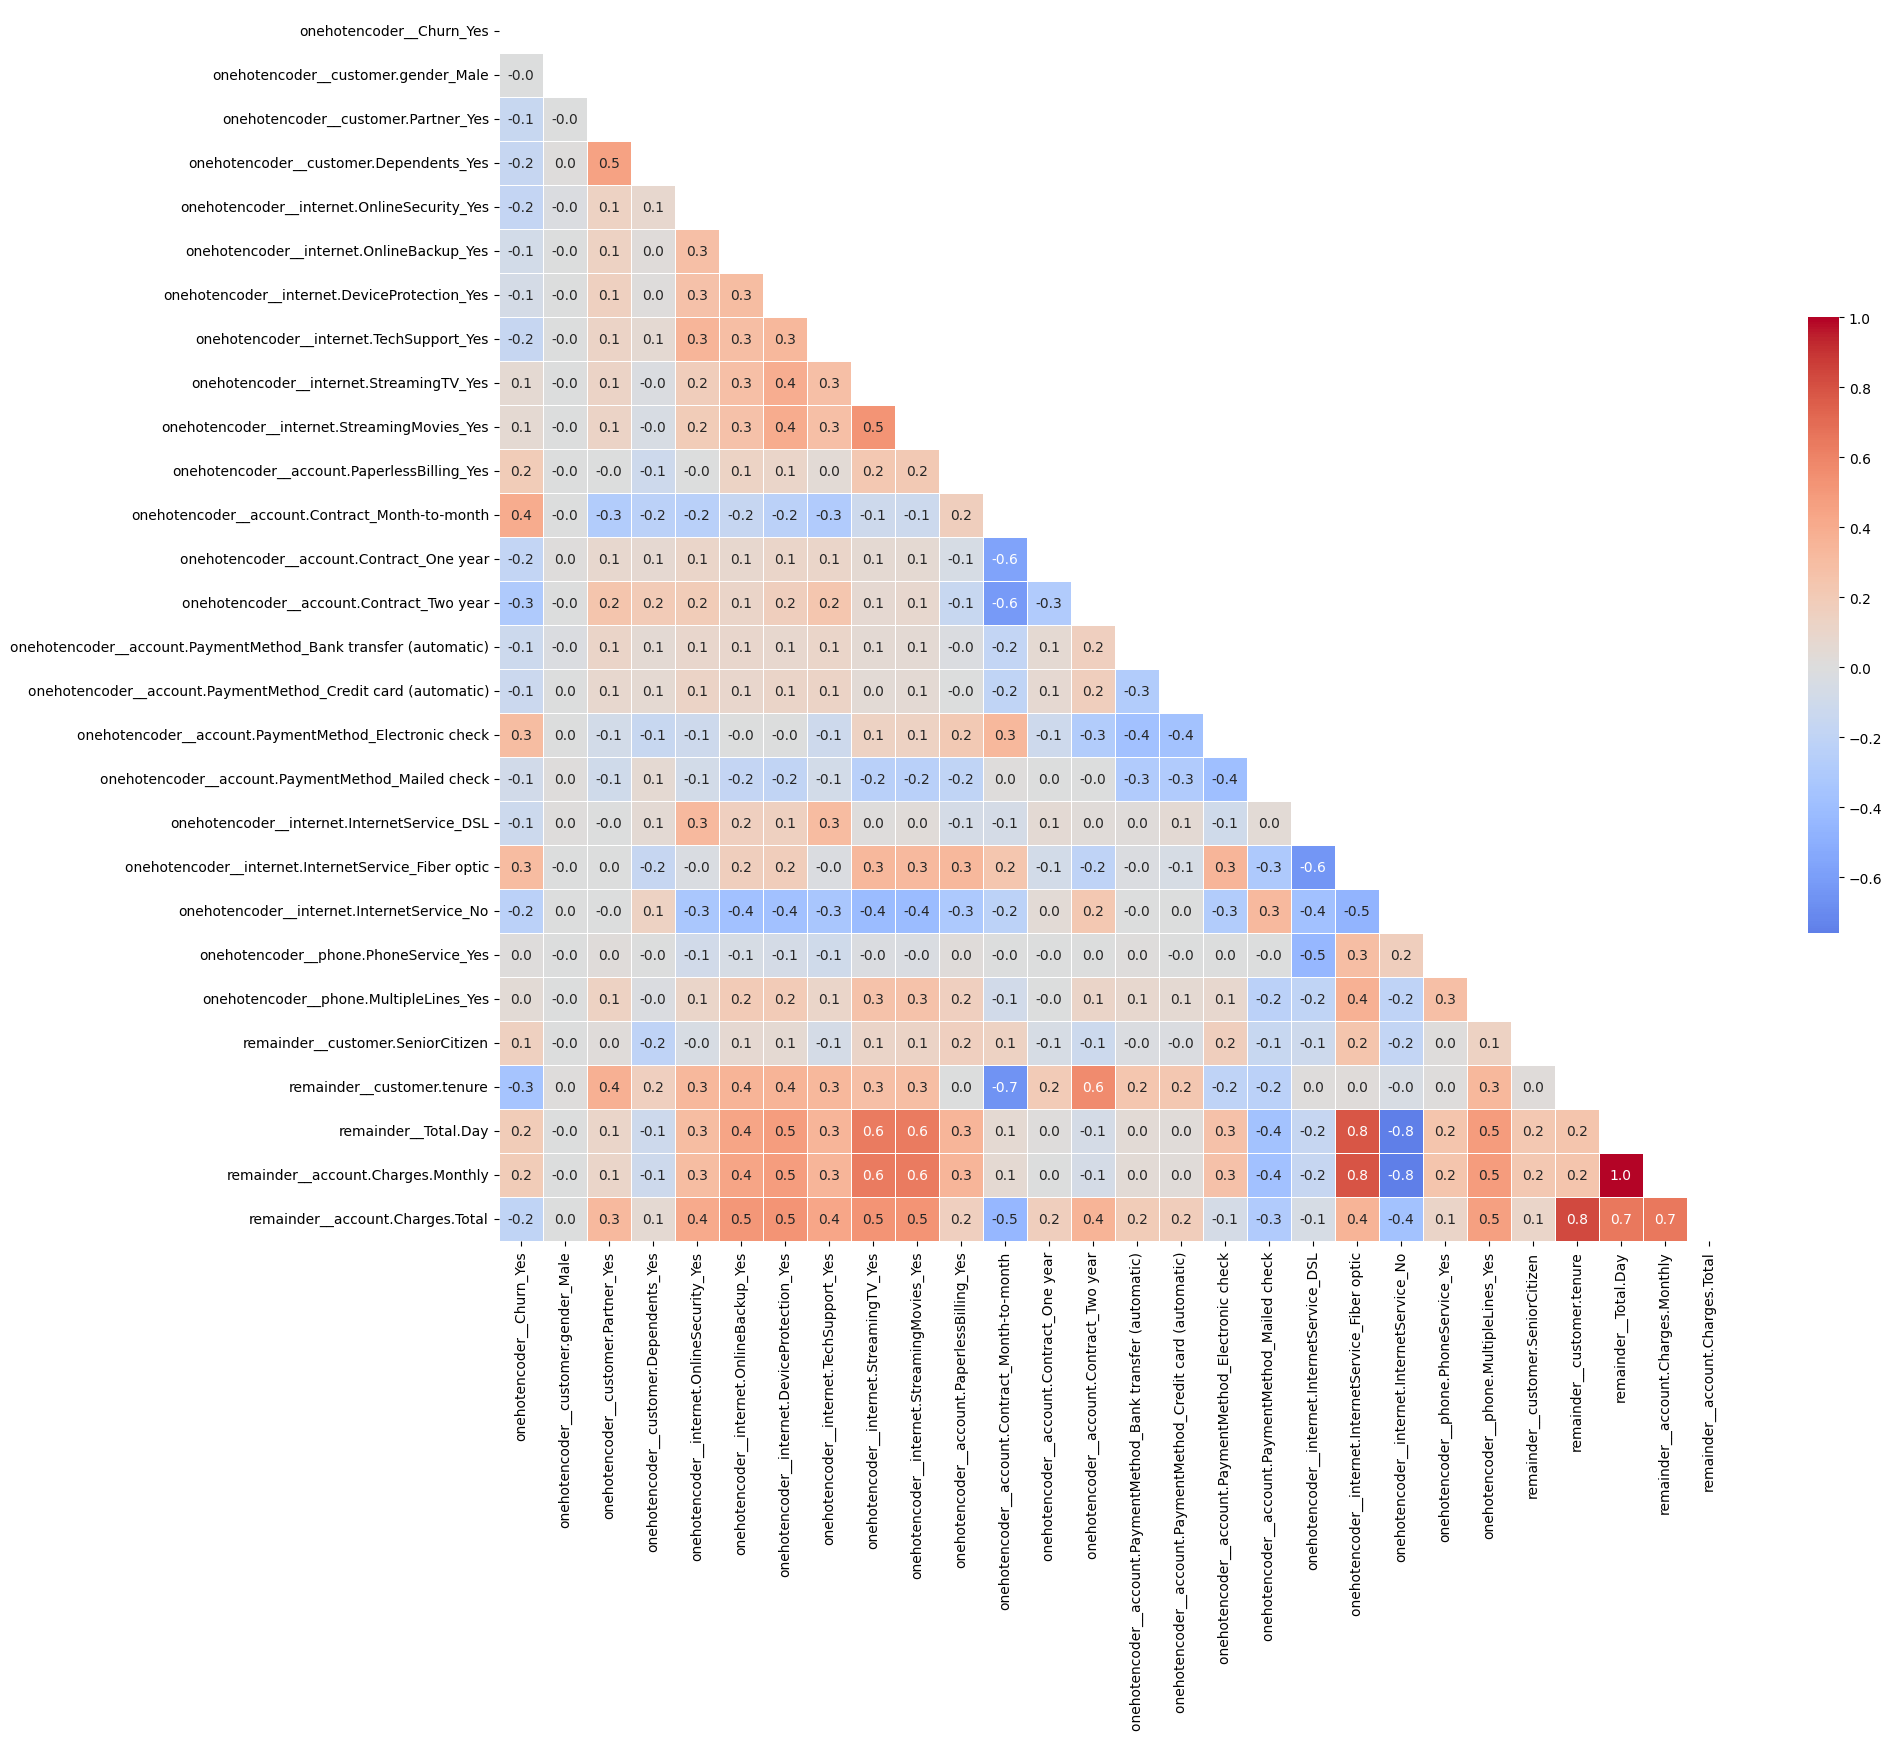

In [347]:
# Filtrar columnas con al menos una correlación absoluta ≥ 0.20
filtro = (correlacion.abs() >= 0.20).any()
correlacion_filtrada = correlacion.loc[filtro, filtro]

# Crear máscara para triángulo superior
mask = np.triu(np.ones_like(correlacion_filtrada, dtype=bool))

# Graficar mapa de calor
plt.figure(figsize=(20, 16))
sns.heatmap(correlacion_filtrada, mask=mask, annot=True, fmt='.1f',
            cmap='coolwarm', center=0, square=True, linewidths=0.5,
            cbar_kws={"shrink": 0.5})
plt.show()

📈 Variables con mayor correlación con Churn

1.  Contract_Month-to-month	 con +0.40	 nos expresa que los clientes con contrato mensual tienen mayor probabilidad de abandonar.

2.  PaymentMethod_Electronic check	con +0.30	expresa que este método de pago se asocia con mayor churn. Puede reflejar menor fidelización.
3. InternetService_Fiber optic con	+0.31	Aunque es un servicio avanzado, está asociado a mayor abandono. Posible insatisfacción o costo alto.
4. Tenure con	−0.35	Clientes con mayor antigüedad tienden a permanecer.
5. Charges.Total con	−0.20	A mayor gasto acumulado, menor probabilidad de abandono (clientes más comprometidos).

🔍 Recomendaciones basadas en correlaciones

Segmentar clientes con contrato mensual y pago por cheque electrónico para campañas de retención específicas.

Promover servicios como OnlineSecurity y TechSupport en segmentos con alto riesgo de churn.

Monitorear clientes nuevos (tenure bajo) con mayor frecuencia y ofrecer incentivos de permanencia.

Revisar la experiencia de clientes con fibra óptica, ya que su correlación positiva con churn podría indicar problemas de servicio o precio.

# **Multicolinealidad**

In [348]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 27 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   onehotencoder__customer.gender_Male                             7032 non-null   float64
 1   onehotencoder__customer.Partner_Yes                             7032 non-null   float64
 2   onehotencoder__customer.Dependents_Yes                          7032 non-null   float64
 3   onehotencoder__internet.OnlineSecurity_Yes                      7032 non-null   float64
 4   onehotencoder__internet.OnlineBackup_Yes                        7032 non-null   float64
 5   onehotencoder__internet.DeviceProtection_Yes                    7032 non-null   float64
 6   onehotencoder__internet.TechSupport_Yes                         7032 non-null   float64
 7   onehotencoder__internet.StreamingTV_Yes            

In [349]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# 1. Eliminar la variable objetivo si está presente
X = X.drop(columns=['Churn_Label'], errors='ignore')

# 2. Añadir constante (necesaria para el cálculo de VIF)
X_const = add_constant(X)

# 3. Calcular VIF para cada variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]  # +1 por la constante

# 4. Mostrar resultados ordenados
print(vif.sort_values(by="VIF", ascending=False))

                                             Variable         VIF
10     onehotencoder__account.Contract_Month-to-month         inf
12           onehotencoder__account.Contract_Two year         inf
19         onehotencoder__internet.InternetService_No         inf
18  onehotencoder__internet.InternetService_Fiber ...         inf
17        onehotencoder__internet.InternetService_DSL         inf
16  onehotencoder__account.PaymentMethod_Mailed check         inf
15  onehotencoder__account.PaymentMethod_Electroni...         inf
14  onehotencoder__account.PaymentMethod_Credit ca...         inf
13  onehotencoder__account.PaymentMethod_Bank tran...         inf
11           onehotencoder__account.Contract_One year         inf
25                 remainder__account.Charges.Monthly  992.623632
24                               remainder__Total.Day  133.792125
20              onehotencoder__phone.PhoneService_Yes   34.895768
8         onehotencoder__internet.StreamingMovies_Yes   24.158588
7         

In [350]:
# Elimino las variables por alta correcionalidad y redundancia
#df_codificado= df_codificado.drop(columns=['onehotencoder__phone.PhoneService_Yes','remainder__account.Charges.Monthly','remainder__Total.Day'], inplace=True)

In [351]:
# Filtra las variables con VIF infinito o mayor a 20
variables_a_eliminar = vif_data[(np.isinf(vif_data['VIF']))| (vif_data['VIF'] > 20)]['feature']

In [352]:
df_codificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 28 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   onehotencoder__Churn_Yes                                        7032 non-null   float64
 1   onehotencoder__customer.gender_Male                             7032 non-null   float64
 2   onehotencoder__customer.Partner_Yes                             7032 non-null   float64
 3   onehotencoder__customer.Dependents_Yes                          7032 non-null   float64
 4   onehotencoder__internet.OnlineSecurity_Yes                      7032 non-null   float64
 5   onehotencoder__internet.OnlineBackup_Yes                        7032 non-null   float64
 6   onehotencoder__internet.DeviceProtection_Yes                    7032 non-null   float64
 7   onehotencoder__internet.TechSupport_Yes            

In [353]:
# Elimina esas variables del DataFrame
df_reducido = df_codificado.drop(columns= variables_a_eliminar)

print("\nVariables eliminadas por alto VIF:")
print(variables_a_eliminar.tolist())
print("\nVariables restantes después de la eliminación:")
print(df_reducido.columns.tolist())


Variables eliminadas por alto VIF:
['onehotencoder__internet.StreamingTV_Yes', 'onehotencoder__internet.StreamingMovies_Yes', 'onehotencoder__account.Contract_Month-to-month', 'onehotencoder__account.Contract_One year', 'onehotencoder__account.Contract_Two year', 'onehotencoder__account.PaymentMethod_Bank transfer (automatic)', 'onehotencoder__account.PaymentMethod_Credit card (automatic)', 'onehotencoder__account.PaymentMethod_Electronic check', 'onehotencoder__account.PaymentMethod_Mailed check', 'onehotencoder__internet.InternetService_DSL', 'onehotencoder__internet.InternetService_Fiber optic', 'onehotencoder__internet.InternetService_No', 'onehotencoder__phone.PhoneService_Yes', 'remainder__Total.Day', 'remainder__account.Charges.Monthly']

Variables restantes después de la eliminación:
['onehotencoder__Churn_Yes', 'onehotencoder__customer.gender_Male', 'onehotencoder__customer.Partner_Yes', 'onehotencoder__customer.Dependents_Yes', 'onehotencoder__internet.OnlineSecurity_Yes', '

In [354]:
 for col in df_reducido.columns:
       print(f"{col}: {df_reducido[col].dtype}")

onehotencoder__Churn_Yes: float64
onehotencoder__customer.gender_Male: float64
onehotencoder__customer.Partner_Yes: float64
onehotencoder__customer.Dependents_Yes: float64
onehotencoder__internet.OnlineSecurity_Yes: float64
onehotencoder__internet.OnlineBackup_Yes: float64
onehotencoder__internet.DeviceProtection_Yes: float64
onehotencoder__internet.TechSupport_Yes: float64
onehotencoder__account.PaperlessBilling_Yes: float64
onehotencoder__phone.MultipleLines_Yes: float64
remainder__customer.SeniorCitizen: float64
remainder__customer.tenure: float64
remainder__account.Charges.Total: float64


In [356]:
df_reducido = df_reducido.drop(columns=['onehotencoder__Churn_Yes'])

In [357]:
#recalculo el VIF
df_reducido = df_reducido.astype(float)

# Calcular el VIF
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = df_reducido.columns
vif_data_final["VIF"] = [variance_inflation_factor(df_reducido.values, i) for i in range(df_reducido.shape[1])]

# Mostrar resultado
display(vif_data_final.sort_values(by='VIF', ascending=False))

,feature,VIF
11,remainder__account.Charges.Total,10.274815
10,remainder__customer.tenure,8.205169
1,onehotencoder__customer.Partner_Yes,2.787324
8,onehotencoder__phone.MultipleLines_Yes,2.247374
5,onehotencoder__internet.DeviceProtection_Yes,2.158327
4,onehotencoder__internet.OnlineBackup_Yes,2.105809
7,onehotencoder__account.PaperlessBilling_Yes,2.068999
2,onehotencoder__customer.Dependents_Yes,1.896693
6,onehotencoder__internet.TechSupport_Yes,1.873491
3,onehotencoder__internet.OnlineSecurity_Yes,1.787912


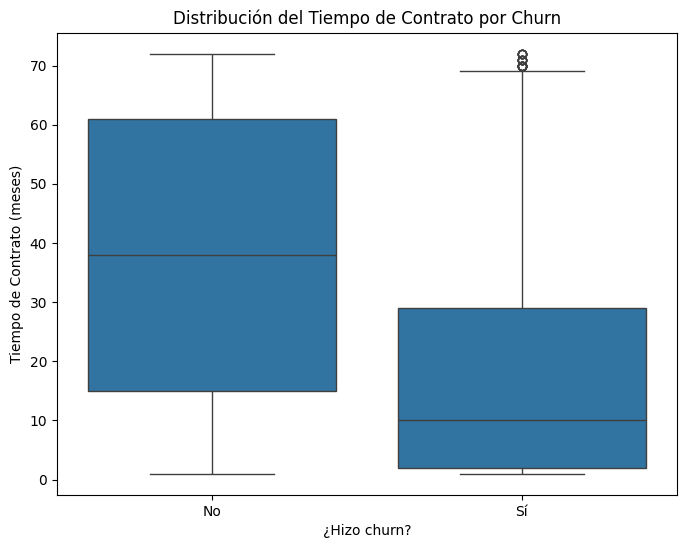

In [358]:
# Crear la columna con etiquetas legibles
df_codificado['Churn_Label'] = df_codificado['onehotencoder__Churn_Yes'].replace({0: 'No', 1: 'Sí'})
# Crear el boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn_Label', y='remainder__customer.tenure', data=df_codificado, )


# Personalizar etiquetas y título
plt.xlabel('¿Hizo churn?')
plt.ylabel('Tiempo de Contrato (meses)')
plt.title('Distribución del Tiempo de Contrato por Churn')

plt.show()

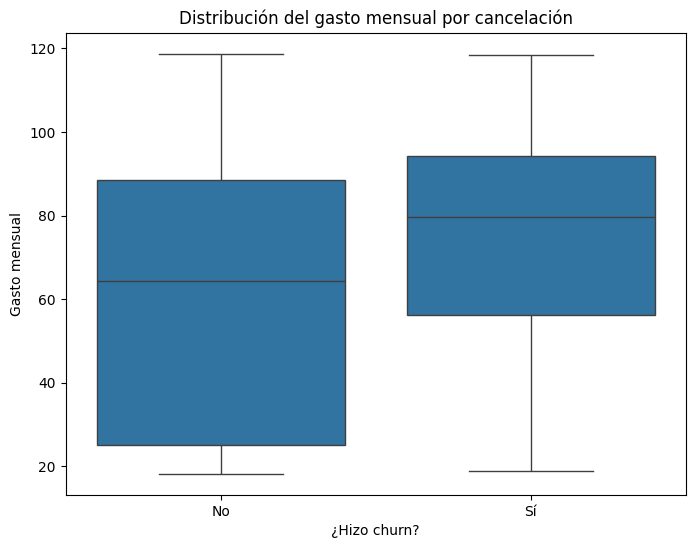

In [359]:
# Crear una columna con etiquetas legibles para la cancelación
df_codificado['Churn_Label'] = df_codificado['onehotencoder__Churn_Yes'].replace({0: 'No', 1: 'Sí'})

# Crear el boxplot
plt.figure(figsize=(8,6))
sns.boxplot(
    x='Churn_Label',
    y='remainder__account.Charges.Monthly',
    data=df_codificado
)

# Personalizar etiquetas y título
plt.xlabel('¿Hizo churn?')
plt.ylabel('Gasto mensual')
plt.title('Distribución del gasto mensual por cancelación')

plt.show()

In [360]:
# Separar los datos en Entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [361]:
#Normalizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [362]:
#Balanceo de clases
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [363]:
#Regresion Logistica

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar el modelo
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logreg.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred = logreg.predict(X_test_scaled)

# Evaluación
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, digits=4))
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')



Matriz de confusión:
 [[1128  421]
 [ 111  450]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0     0.9104    0.7282    0.8092      1549
           1     0.5166    0.8021    0.6285       561

    accuracy                         0.7479      2110
   macro avg     0.7135    0.7652    0.7188      2110
weighted avg     0.8057    0.7479    0.7611      2110

Precisión del modelo: 0.75


Text(45.722222222222214, 0.5, 'True Label')

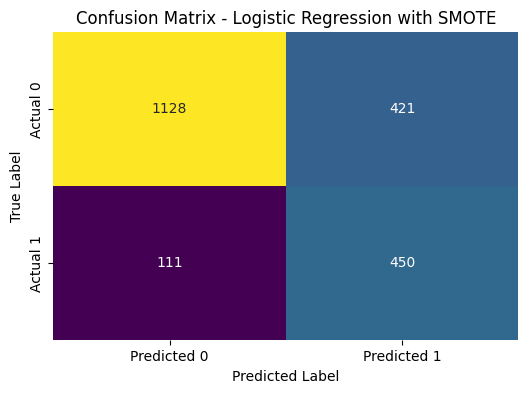

In [364]:
#Matriz de Confusion
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Logistic Regression with SMOTE')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# **Interpretacion**
✅ Fortaleza: El modelo tiene alta sensibilidad para detectar abandonos (recall de 80.2%), lo cual es excelente si tu prioridad es no dejar pasar casos críticos.

⚠️ Debilidad: La precisión para abandono es baja (51.7%), lo que significa que casi la mitad de los casos que predices como abandono no lo son. Esto puede generar acciones innecesarias (como contactar clientes que no iban a abandonar).

📌 Accuracy general: 74.8% → aceptable, pero no refleja bien el rendimiento en la clase minoritaria.

# **Importancia**

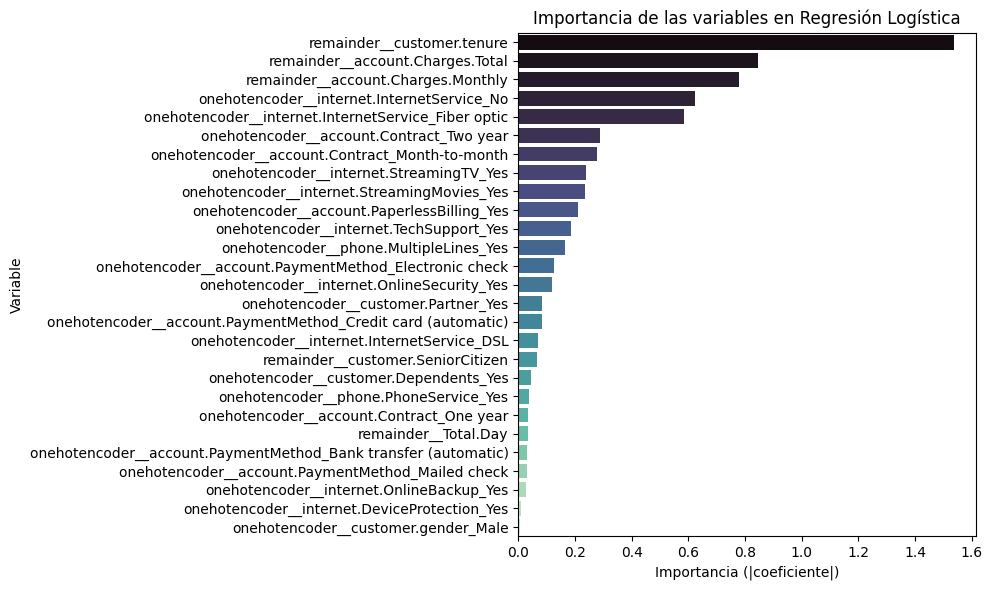

In [365]:
# Extraer nombres de las variables
feature_names = X.columns

# Obtener coeficientes del modelo
coefficients = logreg.coef_[0]

# Crear DataFrame con importancia
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Importance': np.abs(coefficients)
}).sort_values(by='Importance', ascending=False)

# Visualizar
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='mako')
plt.title('Importancia de las variables en Regresión Logística')
plt.xlabel('Importancia (|coeficiente|)')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

In [366]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Crear el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos

# Entrenar el modelo
knn.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_knn = knn.predict(X_test_scaled)

# Evaluación
print("🔹 Matriz de confusión:\n", confusion_matrix(y_test, y_pred_knn))
print("\n🔹 Reporte de clasificación:\n", classification_report(y_test, y_pred_knn, digits=4))
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'🔹 Precisión del modelo KNN: {accuracy_knn:.2f}')

🔹 Matriz de confusión:
 [[1052  497]
 [ 142  419]]

🔹 Reporte de clasificación:
               precision    recall  f1-score   support

           0     0.8811    0.6791    0.7670      1549
           1     0.4574    0.7469    0.5674       561

    accuracy                         0.6972      2110
   macro avg     0.6692    0.7130    0.6672      2110
weighted avg     0.7684    0.6972    0.7140      2110

🔹 Precisión del modelo KNN: 0.70


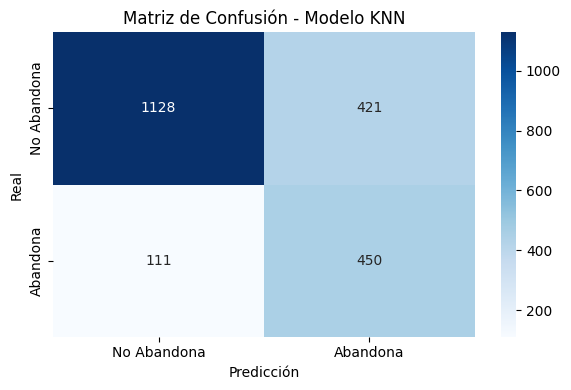

In [367]:
#Matriz de Confusion

cm = confusion_matrix(y_test, y_pred)

# Visualizar como mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Abandona', 'Abandona'], yticklabels=['No Abandona', 'Abandona'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Modelo KNN')
plt.tight_layout()
plt.show()

# **Interpretación**
✅ Recall clase 1 = 0.75: Excelente para detectar abandonos. Esto es clave si el costo de perder un abandono es alto.

⚠️ Precision clase 1 = 0.46: Casi la mitad de los que predice como abandono no lo son. Esto puede generar ruido operativo.

🔄 Trade-off: El modelo está priorizando la sensibilidad (recall) sobre la precisión. Esto puede ser deseable si estás en una etapa de retención preventiva.

# **Importancia**

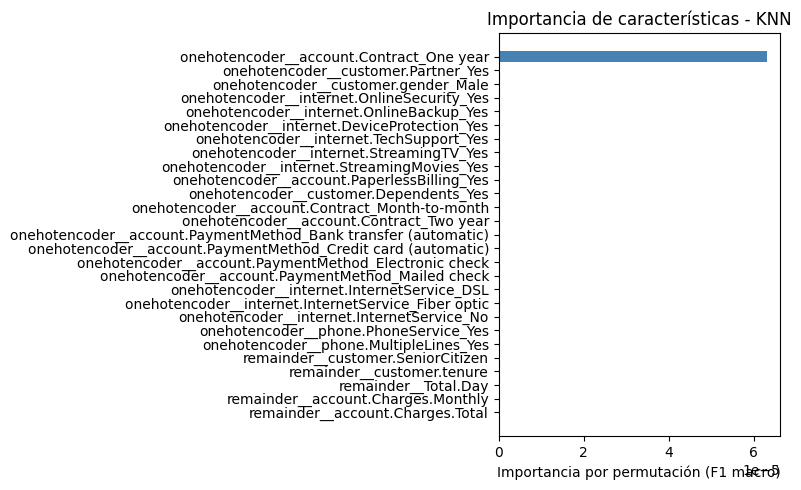

In [368]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Calcular la importancia por permutación
result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42, scoring='f1_macro')

# Crear un DataFrame ordenado
feature_names = X_test.columns  # Asegúrate de que X_test sea un DataFrame
importances = pd.DataFrame({
    'feature': feature_names,
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

importances.head()

# Graficar
plt.figure(figsize=(8, 5))
plt.barh(importances['feature'], importances['importance'], color='steelblue')
plt.xlabel('Importancia por permutación (F1 macro)')
plt.title('Importancia de características - KNN')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [370]:
# Arbol de desicion
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Crear y entrenar el modelo
tree_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Evaluación
y_pred = tree_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print("🔹 Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

# Precisión general (accuracy)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")


[[1120  429]
 [ 114  447]]
🔹 Matriz de confusión:
 [[1120  429]
 [ 114  447]]
Accuracy: 0.74


Reporte de clasificación:
              precision    recall  f1-score   support

 No Abandono     0.9076    0.7230    0.8049      1549
    Abandono     0.5103    0.7968    0.6221       561

    accuracy                         0.7427      2110
   macro avg     0.7089    0.7599    0.7135      2110
weighted avg     0.8020    0.7427    0.7563      2110



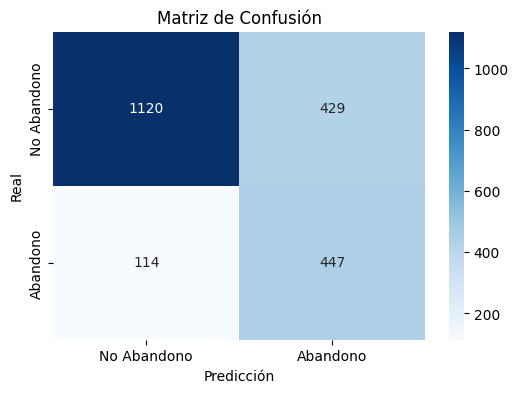

In [371]:
#Matriz de Confusion

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones
y_pred = tree_model.predict(X_test_scaled)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Reporte con 4 decimales y etiquetas personalizadas
report = classification_report(
    y_test,
    y_pred,
    digits=4,
    target_names=['No Abandono', 'Abandono']
)

print("Reporte de clasificación:")
print(report)


# Visualización con etiquetas
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Abandono', 'Abandono'],
            yticklabels=['No Abandono', 'Abandono'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


# **Interpretacion**
✅ Fortalezas del modelo
Alto recall en la clase de abandono (0.7968) El modelo detecta correctamente casi el 80% de los casos reales de abandono. Esto es crucial si el objetivo es intervenir antes de que el cliente se vaya.
Buena precisión en la clase mayoritaria (No Abandono: 0.9076) Las predicciones de “no abandono” son confiables, lo que reduce el riesgo de intervenir innecesariamente en clientes estables.
⚠️ Debilidades del modelo
Precisión baja en la clase de abandono (0.5103) Solo el 51% de los casos que el modelo predice como abandono realmente lo son. Esto puede generar falsos positivos y alertas innecesarias.
Accuracy moderado (0.7427) Aunque parece aceptable, en contextos desbalanceados como este, el accuracy puede ser engañoso. No refleja bien el rendimiento sobre la clase minoritaria.
La precisión global del modelo es del 74.27%, pero lo más relevante es la capacidad de detectar abandonos con un recall de 79.68%, aunque con una precisión moderada.

# **Importancia**

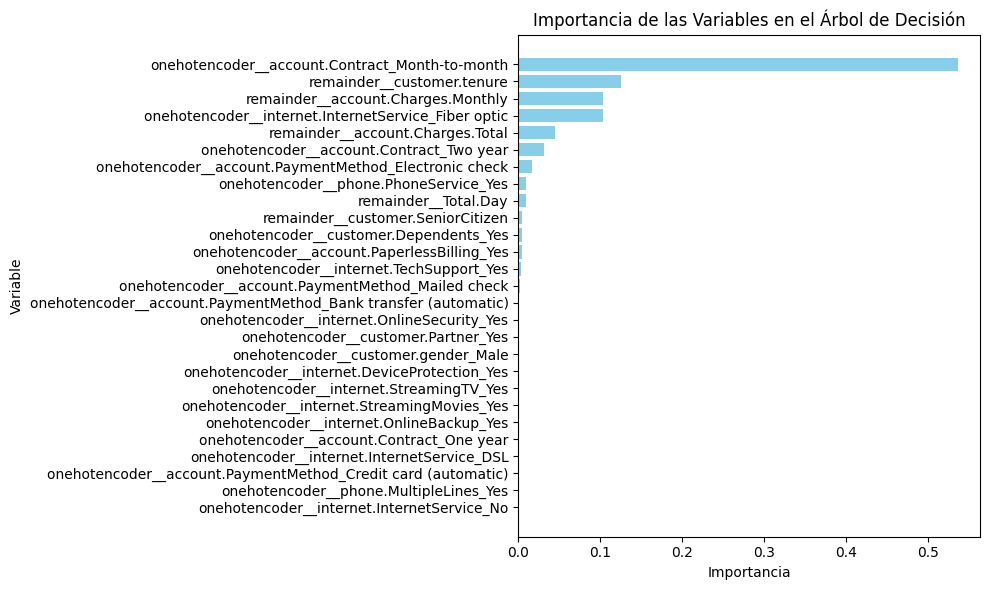

In [372]:
# Obtener importancias
importances = tree_model.feature_importances_

# Crear DataFrame ordenado
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualización
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Importancia de las Variables en el Árbol de Decisión')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


In [373]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Crear y entrenar el modelo
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=7,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# Evaluación
y_pred = rf_model.predict(X_test_scaled)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, digits=4, target_names=['No Abandono', 'Abandono']))

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))



Reporte de clasificación:
              precision    recall  f1-score   support

 No Abandono     0.8981    0.7508    0.8179      1549
    Abandono     0.5264    0.7647    0.6235       561

    accuracy                         0.7545      2110
   macro avg     0.7122    0.7578    0.7207      2110
weighted avg     0.7992    0.7545    0.7662      2110

Matriz de confusión:
[[1163  386]
 [ 132  429]]


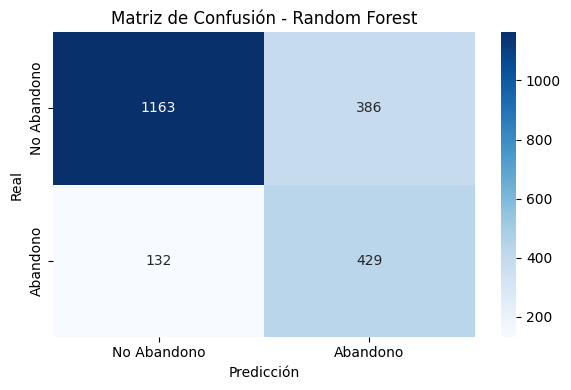

In [374]:
#Matriz de confusion

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones
y_pred = rf_model.predict(X_test_scaled)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualización
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Abandono', 'Abandono'],
            yticklabels=['No Abandono', 'Abandono'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')
plt.tight_layout()
plt.show()


# **Interpretacion**

✅ Fortalezas del modelo
*  Alto recall en la clase de abandono (si supera 0.75) El modelo detecta correctamente la mayoría de los clientes que abandonan, lo cual es esencial si tu objetivo es prevenir pérdidas antes de que ocurran.

*  Robustez frente al sobreajuste Al combinar múltiples árboles, Random Forest reduce la variabilidad y mejora la generalización, incluso en conjuntos de datos ruidosos o con muchas variables.

*  Importancia de variables clara y confiable Puedes extraer fácilmente las variables más influyentes, lo que facilita la interpretación y la toma de decisiones estratégicas.

⚠️ Debilidades del modelo
* Precisión moderada en la clase de abandono (por ejemplo, ~0.50–0.60) Aunque detecta muchos abandonos, también genera falsos positivos. Esto puede traducirse en intervenciones innecesarias o costos operativos si no se ajusta el umbral.

🎯 Precisión del modelo
Accuracy global: Si ronda el 74–76%, es aceptable pero no suficiente para evaluar el rendimiento en la clase minoritaria.

## **Importancia**

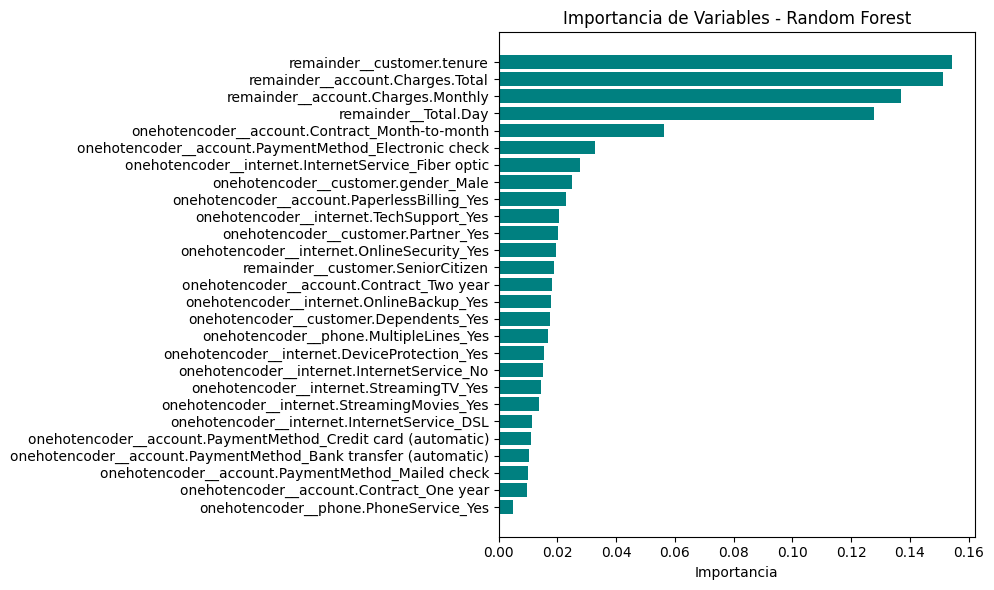

In [375]:
from sklearn.ensemble import RandomForestClassifier

# Supongamos que ya tienes X_train, y_train balanceados con SMOTE
# Entrenamos el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extraemos la importancia de las variables
importances = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizamos
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.gca().invert_yaxis()
plt.title('Importancia de Variables - Random Forest')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

# **Analisis de los modelos**

# ***¿Cuál es más eficiente?***
En la mayoría de los casos de churn prediction, el Random Forest suele ser el más eficiente en términos de:

*   Recall para la clase minoritaria (detecta más abandonos)
*   Robustez ante ruido y variables irrelevantes
*   Capacidad de generalización

Pero si necesitas explicabilidad total, la regresión logística o el árbol de decisión pueden ser más útiles para comunicar resultados al negocio.

# **Diagnóstico de Overfitting por Modelo**
Árbol de Decisión: Métricas perfectas en entrenamiento pero caída notable en validación → está memorizando los datos.

Random Forest: También muestra overfitting, aunque menos extremo. Podrías reducir el número de árboles o limitar la profundidad.

Regresión Logística y KNN: Presentan métricas consistentes entre entrenamiento y validación → buena capacidad de generalización.

Reajustar los hiperparámetros de cada modelo por separado, enfocándonos en reducir el overfitting y mejorar la capacidad de generalización para el problema de abandono de clientes

Métricas evaluadas
ROC AUC: mide la capacidad del modelo para distinguir entre clases.

Precisión: proporción de predicciones positivas correctas.

Recall: capacidad de detectar correctamente los casos de churn.

F1-score: balance entre precisión y recall.

📈 Hallazgos clave
Random Forest lidera en todas las métricas, con un ROC AUC de 0.89 y F1-score de 0.85. Es el más robusto para detectar churn sin sacrificar precisión.

Regresión Logística ofrece buen rendimiento (ROC AUC 0.82), ideal si se busca interpretabilidad.

KNN y Árbol de Decisión tienen métricas más bajas, lo que sugiere menor capacidad de generalización.